In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Data Cleaning and Preprocessing

In [3]:
# Load Data
loadTrainData = pd.read_csv("train.csv")
loadTestData = pd.read_csv("test.csv")
df_train = pd.DataFrame(loadTrainData)
df_test = pd.DataFrame(loadTestData)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Find Null Values in Train Data
df_train['1stFlrSF'].isnull().sum()
print('Count of Null Values in Each Columns:')
for i in df_train.columns:
    nullValues = df_train[i].isnull().sum()
    if nullValues > 0:
        print(f'{i} = {nullValues}')


Count of Null Values in Each Columns:
LotFrontage = 259
Alley = 1369
MasVnrType = 872
MasVnrArea = 8
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Electrical = 1
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81
PoolQC = 1453
Fence = 1179
MiscFeature = 1406


In [5]:
# Find Null Values in Test Data
df_test['1stFlrSF'].isnull().sum()
print('Count of Null Values in Each Columns:')
for i in df_test.columns:
    nullValues = df_test[i].isnull().sum()
    if nullValues > 0:
        print(f'{i} = {nullValues}')

Count of Null Values in Each Columns:
MSZoning = 4
LotFrontage = 227
Alley = 1353
Utilities = 2
Exterior1st = 1
Exterior2nd = 1
MasVnrType = 894
MasVnrArea = 15
BsmtQual = 44
BsmtCond = 45
BsmtExposure = 44
BsmtFinType1 = 42
BsmtFinSF1 = 1
BsmtFinType2 = 42
BsmtFinSF2 = 1
BsmtUnfSF = 1
TotalBsmtSF = 1
BsmtFullBath = 2
BsmtHalfBath = 2
KitchenQual = 1
Functional = 2
FireplaceQu = 731
GarageType = 76
GarageYrBlt = 78
GarageFinish = 78
GarageCars = 1
GarageArea = 1
GarageQual = 78
GarageCond = 78
PoolQC = 1457
Fence = 1170
MiscFeature = 1409
SaleType = 1


In [6]:
# Find Null Values
mask = df_train.map(lambda x: x == '' or x == ' ')
mask.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Fill Null ('' or ' ') Values with np.na
df_train.replace({'': np.nan, ' ': np.nan}, inplace= True)
df_test.replace({'': np.nan, ' ': np.nan}, inplace= True)
for col in df_train.columns:
    if df_train[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_train[col]):
            df_train[col] = df_train[col].fillna(df_train[col].median())
        else:
            df_train[col] = df_train[col].fillna('Unknown')

for col in df_test.columns:
    if df_test[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_test[col]):
            df_test[col] = df_test[col].fillna(df_test[col].median())
        else:
            df_test[col] = df_test[col].fillna('Unknown')

In [8]:
# All Columns Data Type
for i in df_train.columns:
    print(f"{i}: {df_train[i].dtype}")

Id: int64
MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int6

In [9]:
# 2. Exploratory Data Analysis (EDA)

Text(0, 0.5, 'Sales Price')

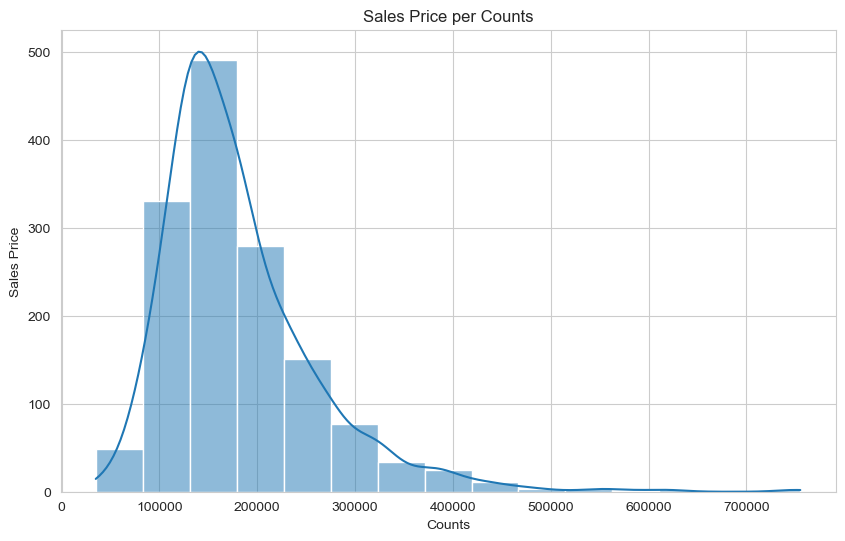

In [10]:
# Visualize Sales Price Data
# Histogram Plot
fig1 = plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.histplot(df_train['SalePrice'], bins= 15, kde= True)
plt.title('Sales Price per Counts')
plt.xlabel('Counts')
plt.ylabel('Sales Price')

<Axes: >

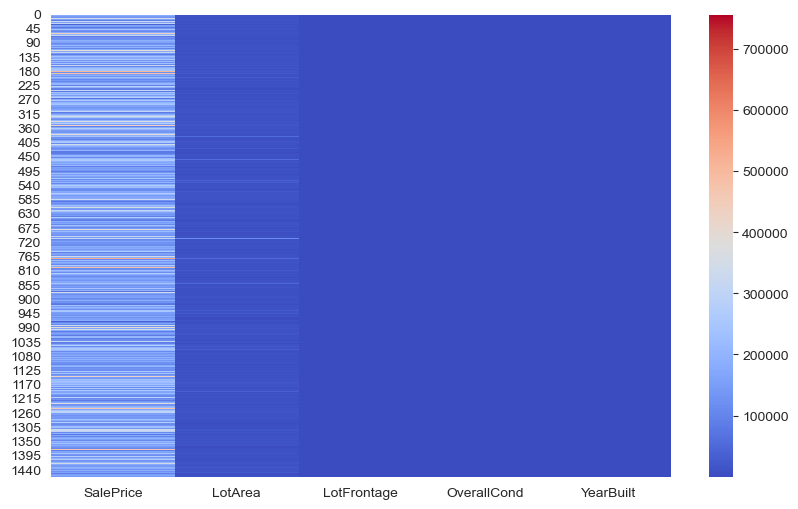

In [11]:
# Heatmap Plot
subset_train = df_train.filter(items= ['SalePrice', 'LotArea', 'LotFrontage', 'OverallCond', 'YearBuilt'])
figure2 = plt.figure(figsize= (10,6))
sns.heatmap(data = subset_train, cmap='coolwarm')

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

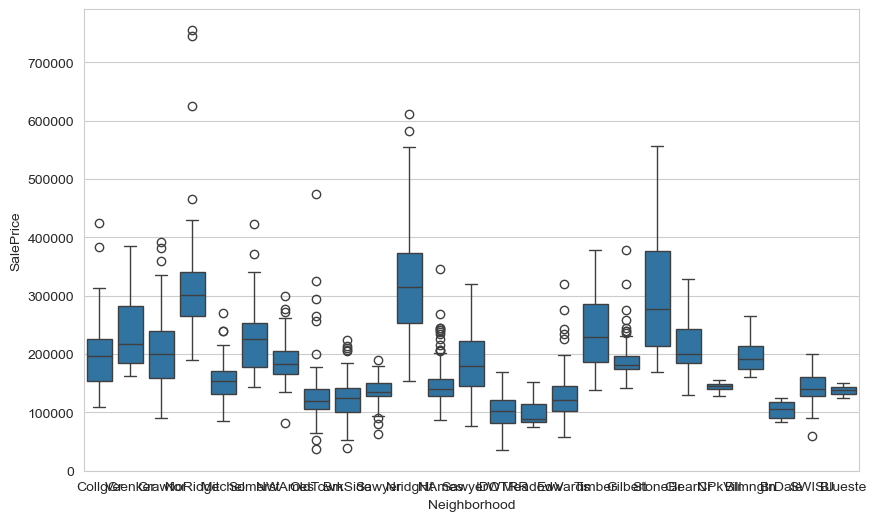

In [12]:
# Boxplot SalePrice by Neighborhood
figure3 = plt.figure(figsize= (10, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

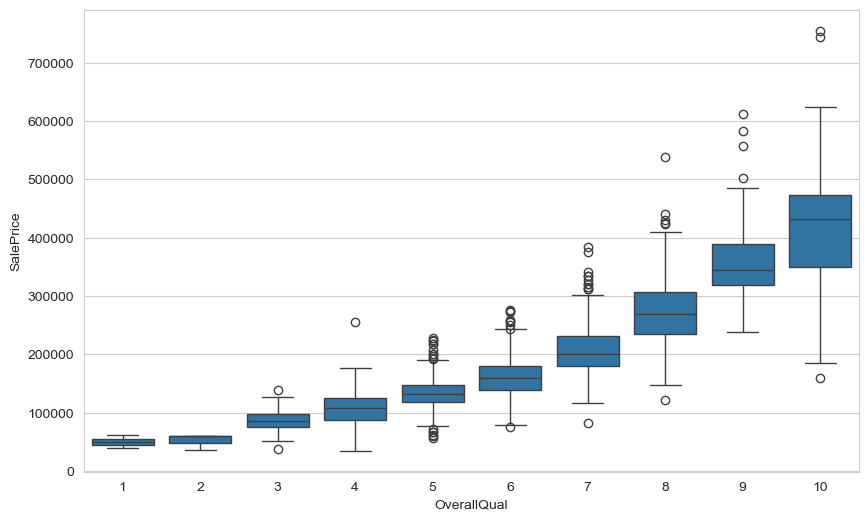

In [13]:
# Boxplot SalePrice by OverallQual
figure4 = plt.figure(figsize= (10,6))
sns.boxplot(x = 'OverallQual', y='SalePrice', data = df_train)

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

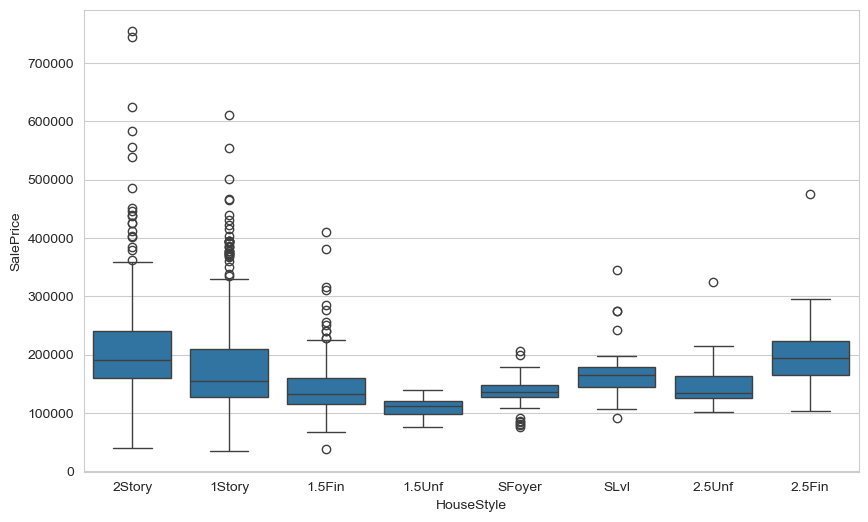

In [14]:
# Boxplot SalePrice by HouseStyle
figure5 = plt.figure(figsize= (10, 6))
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df_train)


In [15]:
# 3. Feature Engineering

In [16]:
# Create New Features
# Create HouseAge Column
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']

# Create TotalSqFt Column
df_train['TotalSqFt'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalSqFt'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [17]:
# 4. Model Building and Training
# Train Test Split
train_ID = df_train['Id']
test_ID = df_test['Id']
y_train  = df_train['SalePrice']
df_train = df_train.drop(['Id', 'SalePrice'], axis=1)
df_test = df_test.drop('Id', axis=1)
combined_data = pd.concat([df_train, df_test], axis=0)
combined_data_encoded = pd.get_dummies(combined_data, drop_first=True)
X = combined_data_encoded.iloc[:len(df_train)]
X_real_test = combined_data_encoded.iloc[len(df_train):]

In [18]:
# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

In [19]:
# 4. Model Building and Training

In [20]:
# Choose and Select Model (Logistic Regression)
logRegModel = LinearRegression()
logRegModel.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# Logistic Regression Prediction
X_real_test_scaled = scaler.transform(X_real_test)
y_pred_logReg = logRegModel.predict(X_real_test_scaled)

In [22]:
# Save Prediction File
df_test_predicted = df_test
df_test_predicted['PredictedSalePrice'] = y_pred_logReg
df_test_predicted['Id'] = test_ID
df_test_predicted.to_csv('predicted.csv', index= False)

In [23]:
# Calculate R2 Score for Linear Regression by using holdout values which mined from train data
X_train_holdout, X_test_holdout, y_train_holdout, y_test_holdout = train_test_split(X, y_train, test_size= 0.2, random_state= 11)
X_test_holdout_scaled = scaler.transform(X_test_holdout)
y_pred_holdout = logRegModel.predict(X_test_holdout_scaled)
r2ScoreLogReg = r2_score(y_test_holdout, y_pred_holdout)
r2ScoreLogReg

0.9368245833968528

In [24]:
# Lasso Regression Model
lassoReg = LassoCV(cv= 4, max_iter= 1000)
lassoReg.fit(X_train_scaled, y_train)

LassoCV(cv=4)

In [25]:
# Lasso Regression Prediction
y_pred_lassoReg = lassoReg.predict(X_real_test_scaled)

In [ ]:
# Calculate R2 Score for Lasso Regression by using holdout values which mined from train data
y_pred_holdout_lasso = lassoReg.predict(X_test_holdout_scaled)
r2ScoreLassoReg = r2_score(y_pred_holdout_lasso, y_pred_holdout)
r2ScoreLassoReg

0.9807646193913833

In [44]:
# Ridge Regression Model
ridgeReg = RidgeCV(cv= 2)
ridgeReg.fit(X_train_scaled, y_train)

RidgeCV(cv=2)

In [45]:
# Ridge Regression Prediction
y_pred_ridgeReg = ridgeReg.predict(X_real_test_scaled)

In [ ]:
# Calculate R2 Score for Ridge Regression by using holdout values which mined from train data
y_pred_holdout_ridge = ridgeReg.predict(X_test_holdout_scaled)
r2ScoreRidgeReg = r2_score(y_pred_holdout_ridge, y_pred_holdout)
r2ScoreRidgeReg

0.9984770639917459